<a href="https://colab.research.google.com/github/NithyaConnect/ds-phython/blob/main/Hair_Pca_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [4]:
path="/content/drive/MyDrive/Factor-Hair-Revised.csv" 
df_test=pd.read_csv(path)
df=df_test.copy()

In [5]:
df.head(5)

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [6]:
#Missing Value Analysis
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [7]:
df.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [8]:
df.drop(["ID","Satisfaction"], axis=1,inplace=True) 



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProdQual     100 non-null    float64
 1   Ecom         100 non-null    float64
 2   TechSup      100 non-null    float64
 3   CompRes      100 non-null    float64
 4   Advertising  100 non-null    float64
 5   ProdLine     100 non-null    float64
 6   SalesFImage  100 non-null    float64
 7   ComPricing   100 non-null    float64
 8   WartyClaim   100 non-null    float64
 9   OrdBilling   100 non-null    float64
 10  DelSpeed     100 non-null    float64
dtypes: float64(11)
memory usage: 8.7 KB


So, there are no missing values.

Let us perform some analysis of the data distribution.

In [10]:
#checking nan values
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
df=df.dropna()


,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed


NAN values also 0

In [11]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"seem to have {n_duplicates} duplicates in database.")


seem to have 0 duplicates in database.


In [ ]:
df

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
5,6.5,2.8,3.1,4.1,4.0,4.3,3.7,8.5,5.1,3.6,3.3
6,6.9,3.7,5.0,2.6,2.1,2.3,5.4,8.9,4.8,2.1,2.0
7,6.2,3.3,3.9,4.8,4.6,3.6,5.1,6.9,5.4,4.3,3.7
8,5.8,3.6,5.1,6.7,3.7,5.9,5.8,9.3,5.9,4.4,4.6
9,6.4,4.5,5.1,6.1,4.7,5.7,5.7,8.4,5.4,4.1,4.4


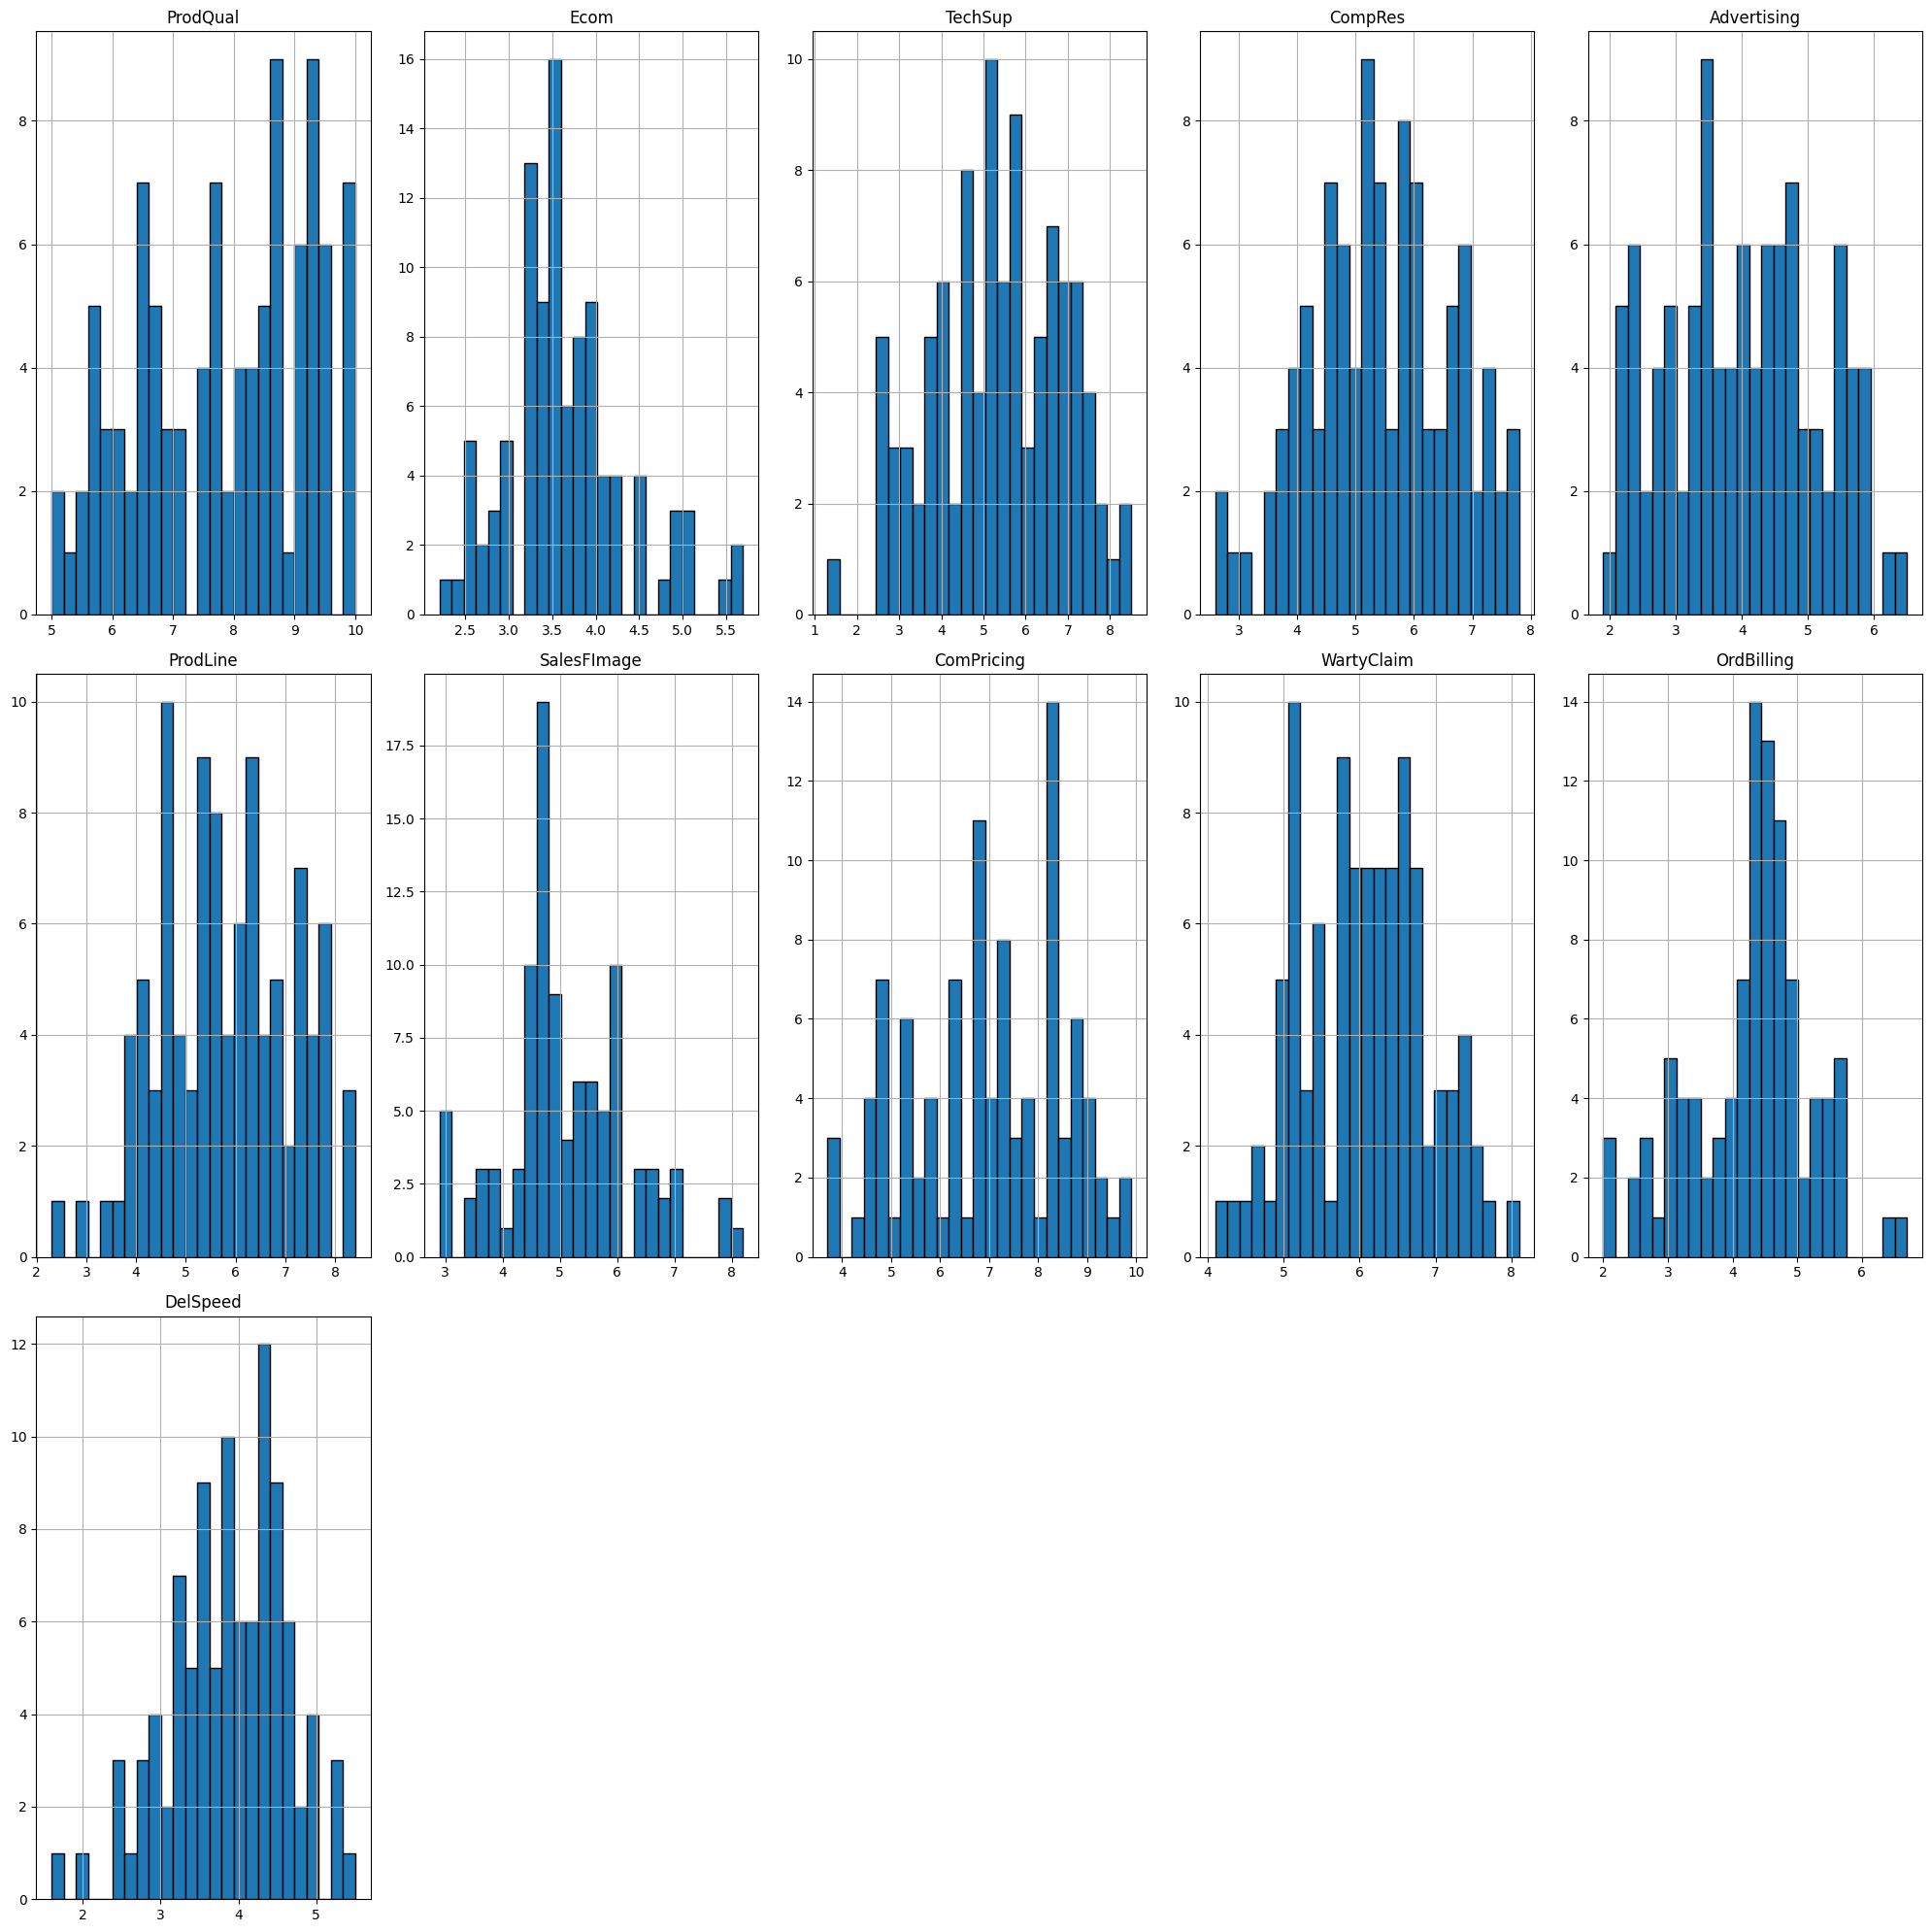

In [12]:
df.hist(bins=25, figsize=(20,20), layout=(-1, 5), edgecolor="black")
plt.tight_layout();


ProdQual
Skew : -0.24


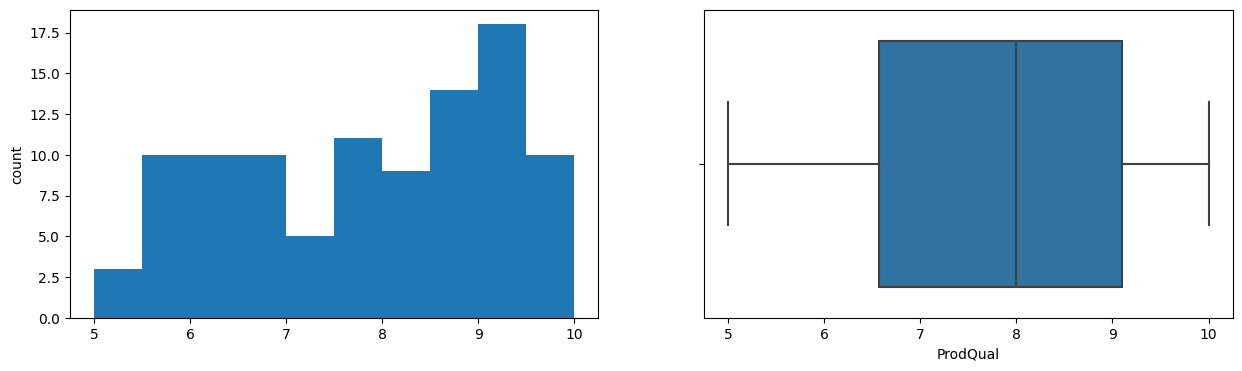

Ecom
Skew : 0.66


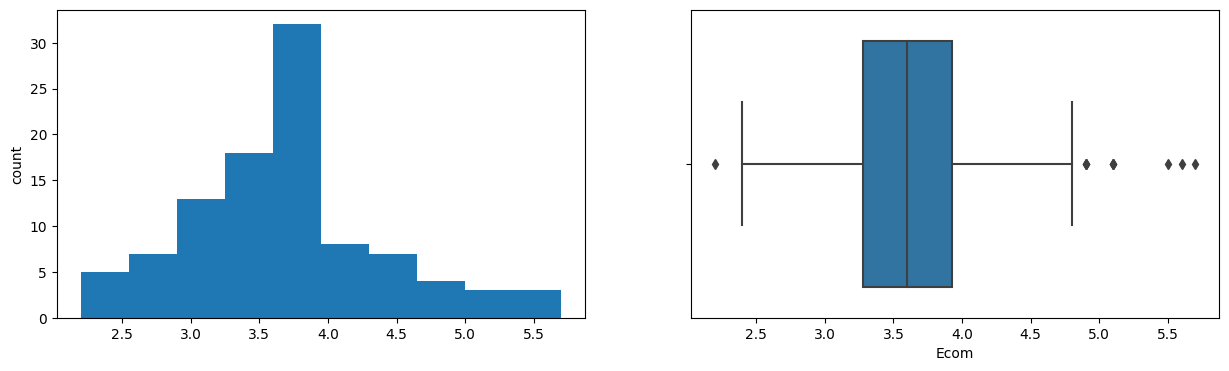

TechSup
Skew : -0.2


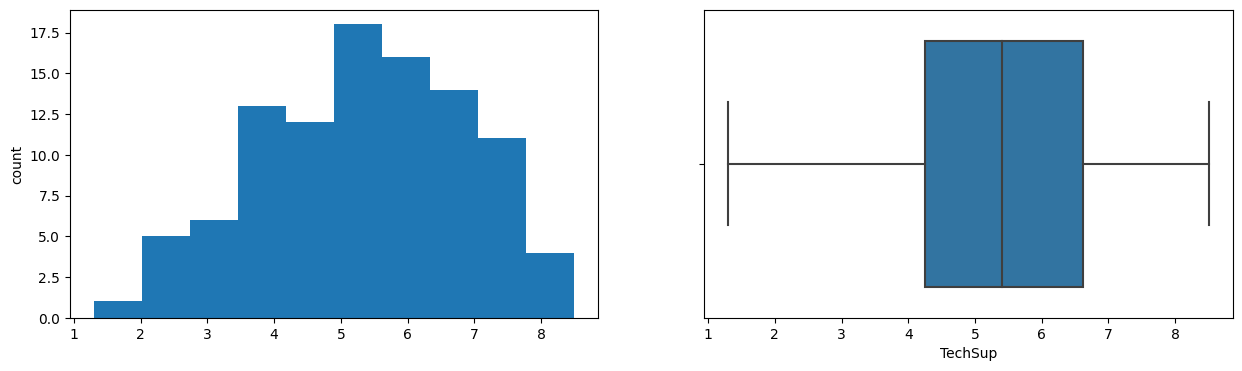

CompRes
Skew : -0.14


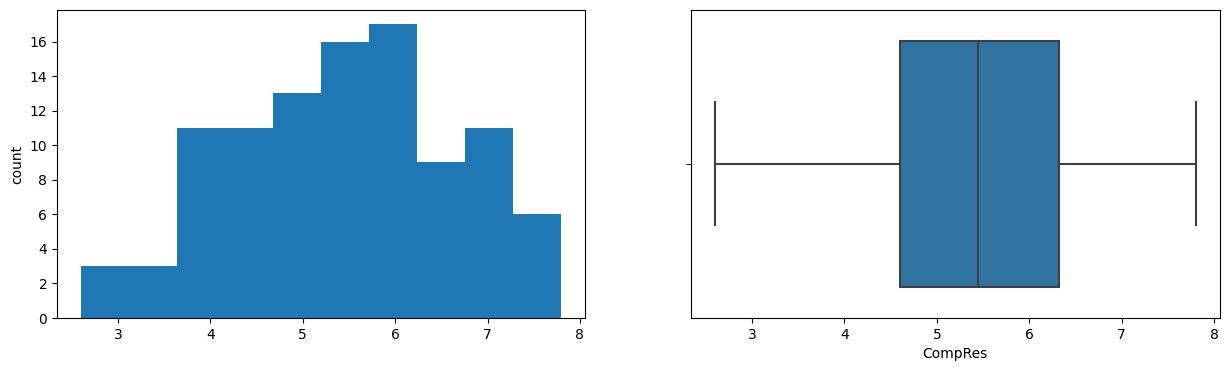

Advertising
Skew : 0.04


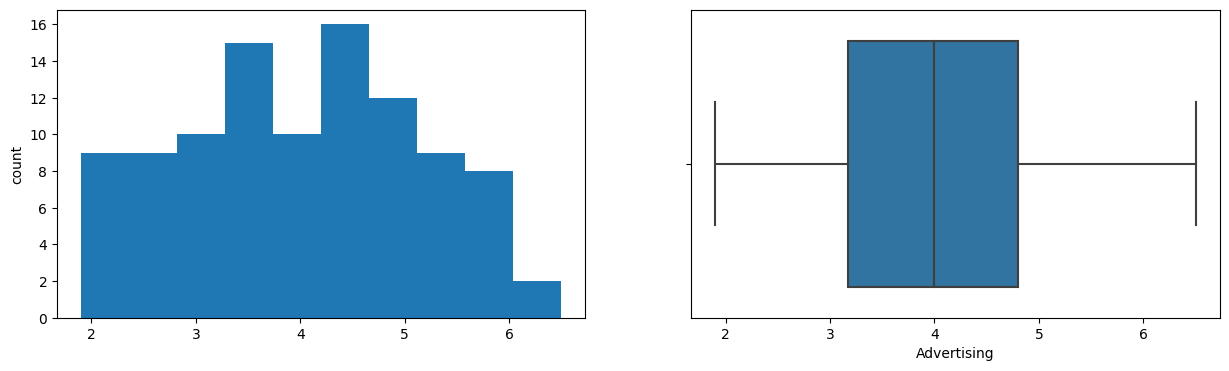

ProdLine
Skew : -0.09


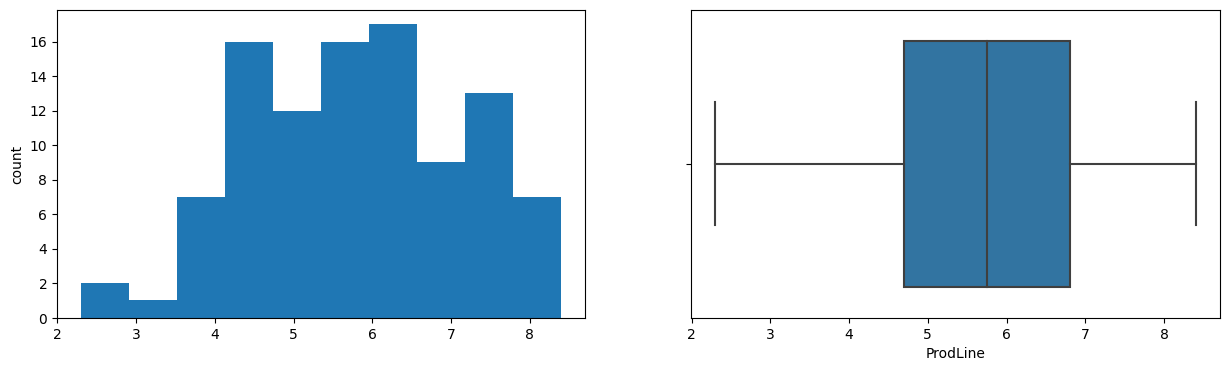

SalesFImage
Skew : 0.38


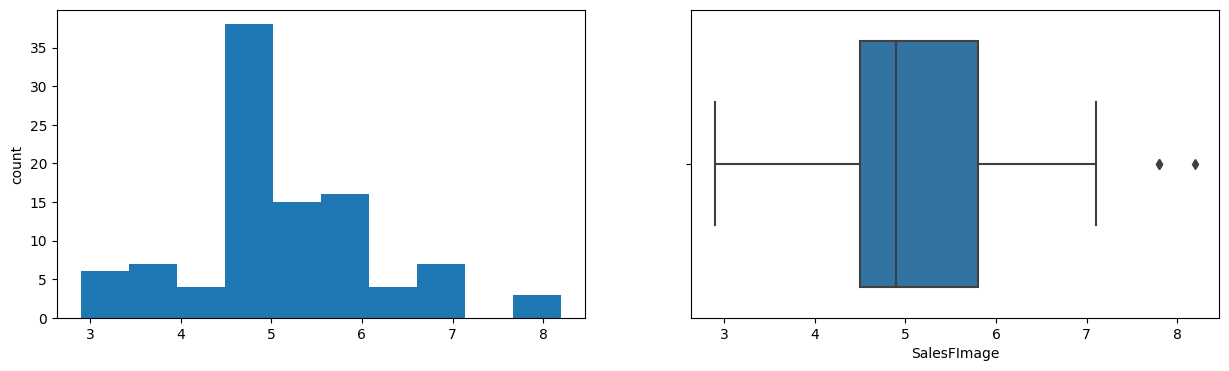

ComPricing
Skew : -0.24


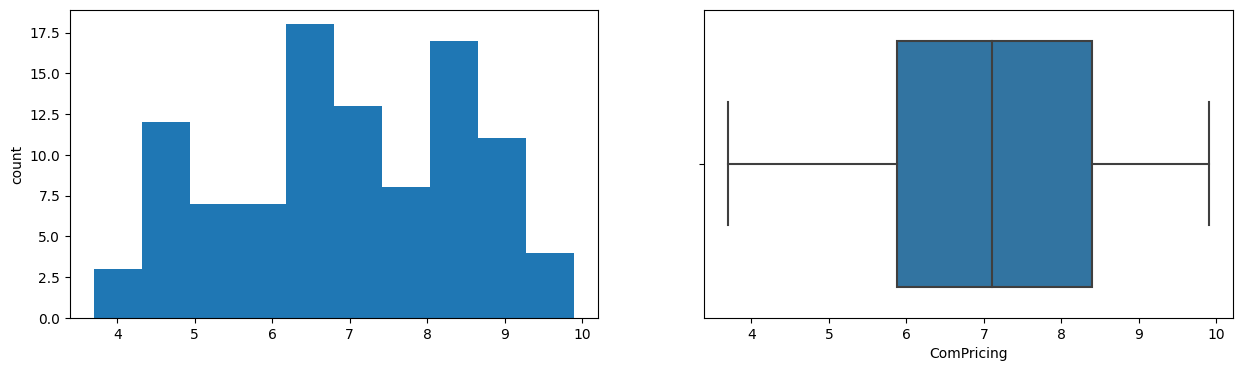

WartyClaim
Skew : 0.01


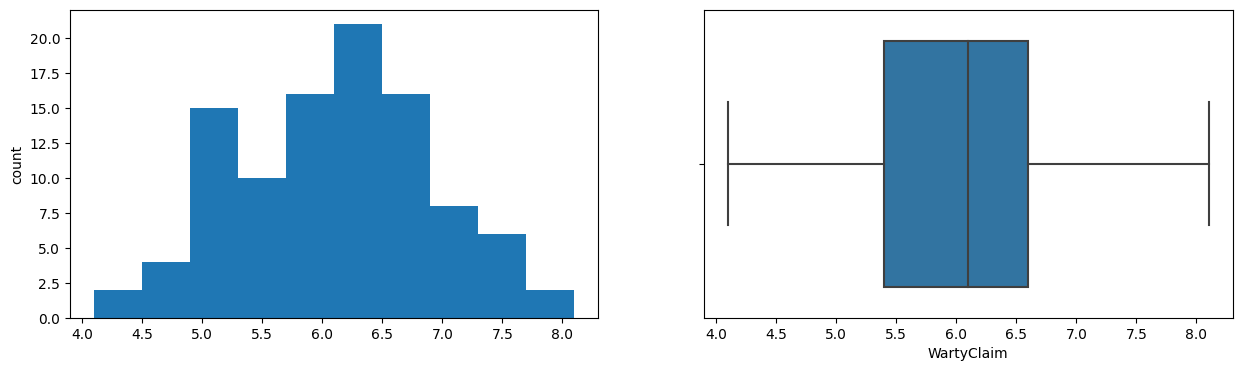

OrdBilling
Skew : -0.33


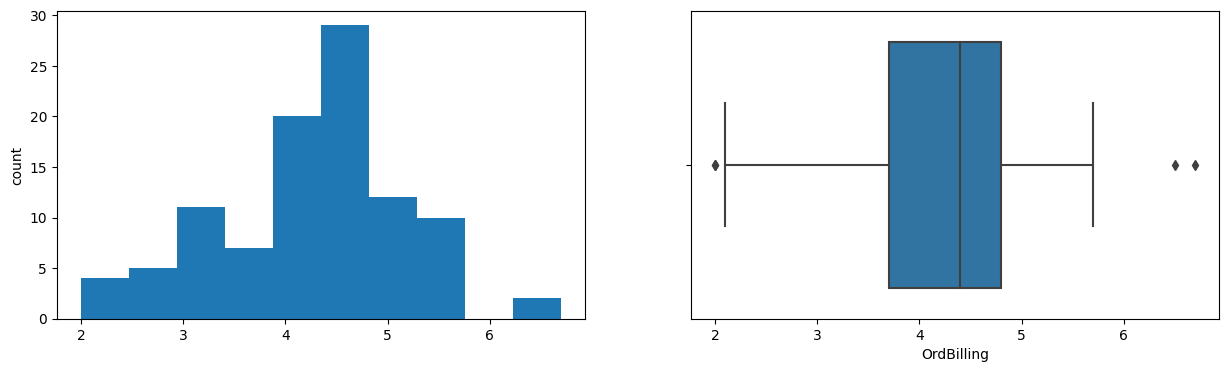

DelSpeed
Skew : -0.46


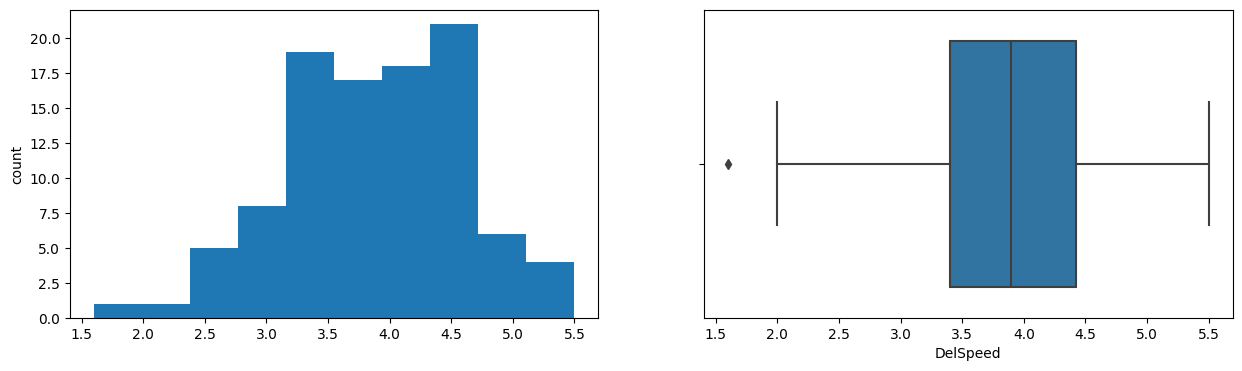

In [15]:
for col in df.columns[0:]:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [14]:
df.columns


Index(['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 'ProdLine',
       'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling', 'DelSpeed'],
      dtype='object')

In [ ]:
d

SalesFImage is right skewed with outliers,Ecom ,ord billing and Delspeed also have outliers.
ecom ,advertising,Wartyclaim are positive skewed
ProdQual,TechSup,ComRes,ProdLine,Copmpricing,ordbilling,delspeed are negative skewed

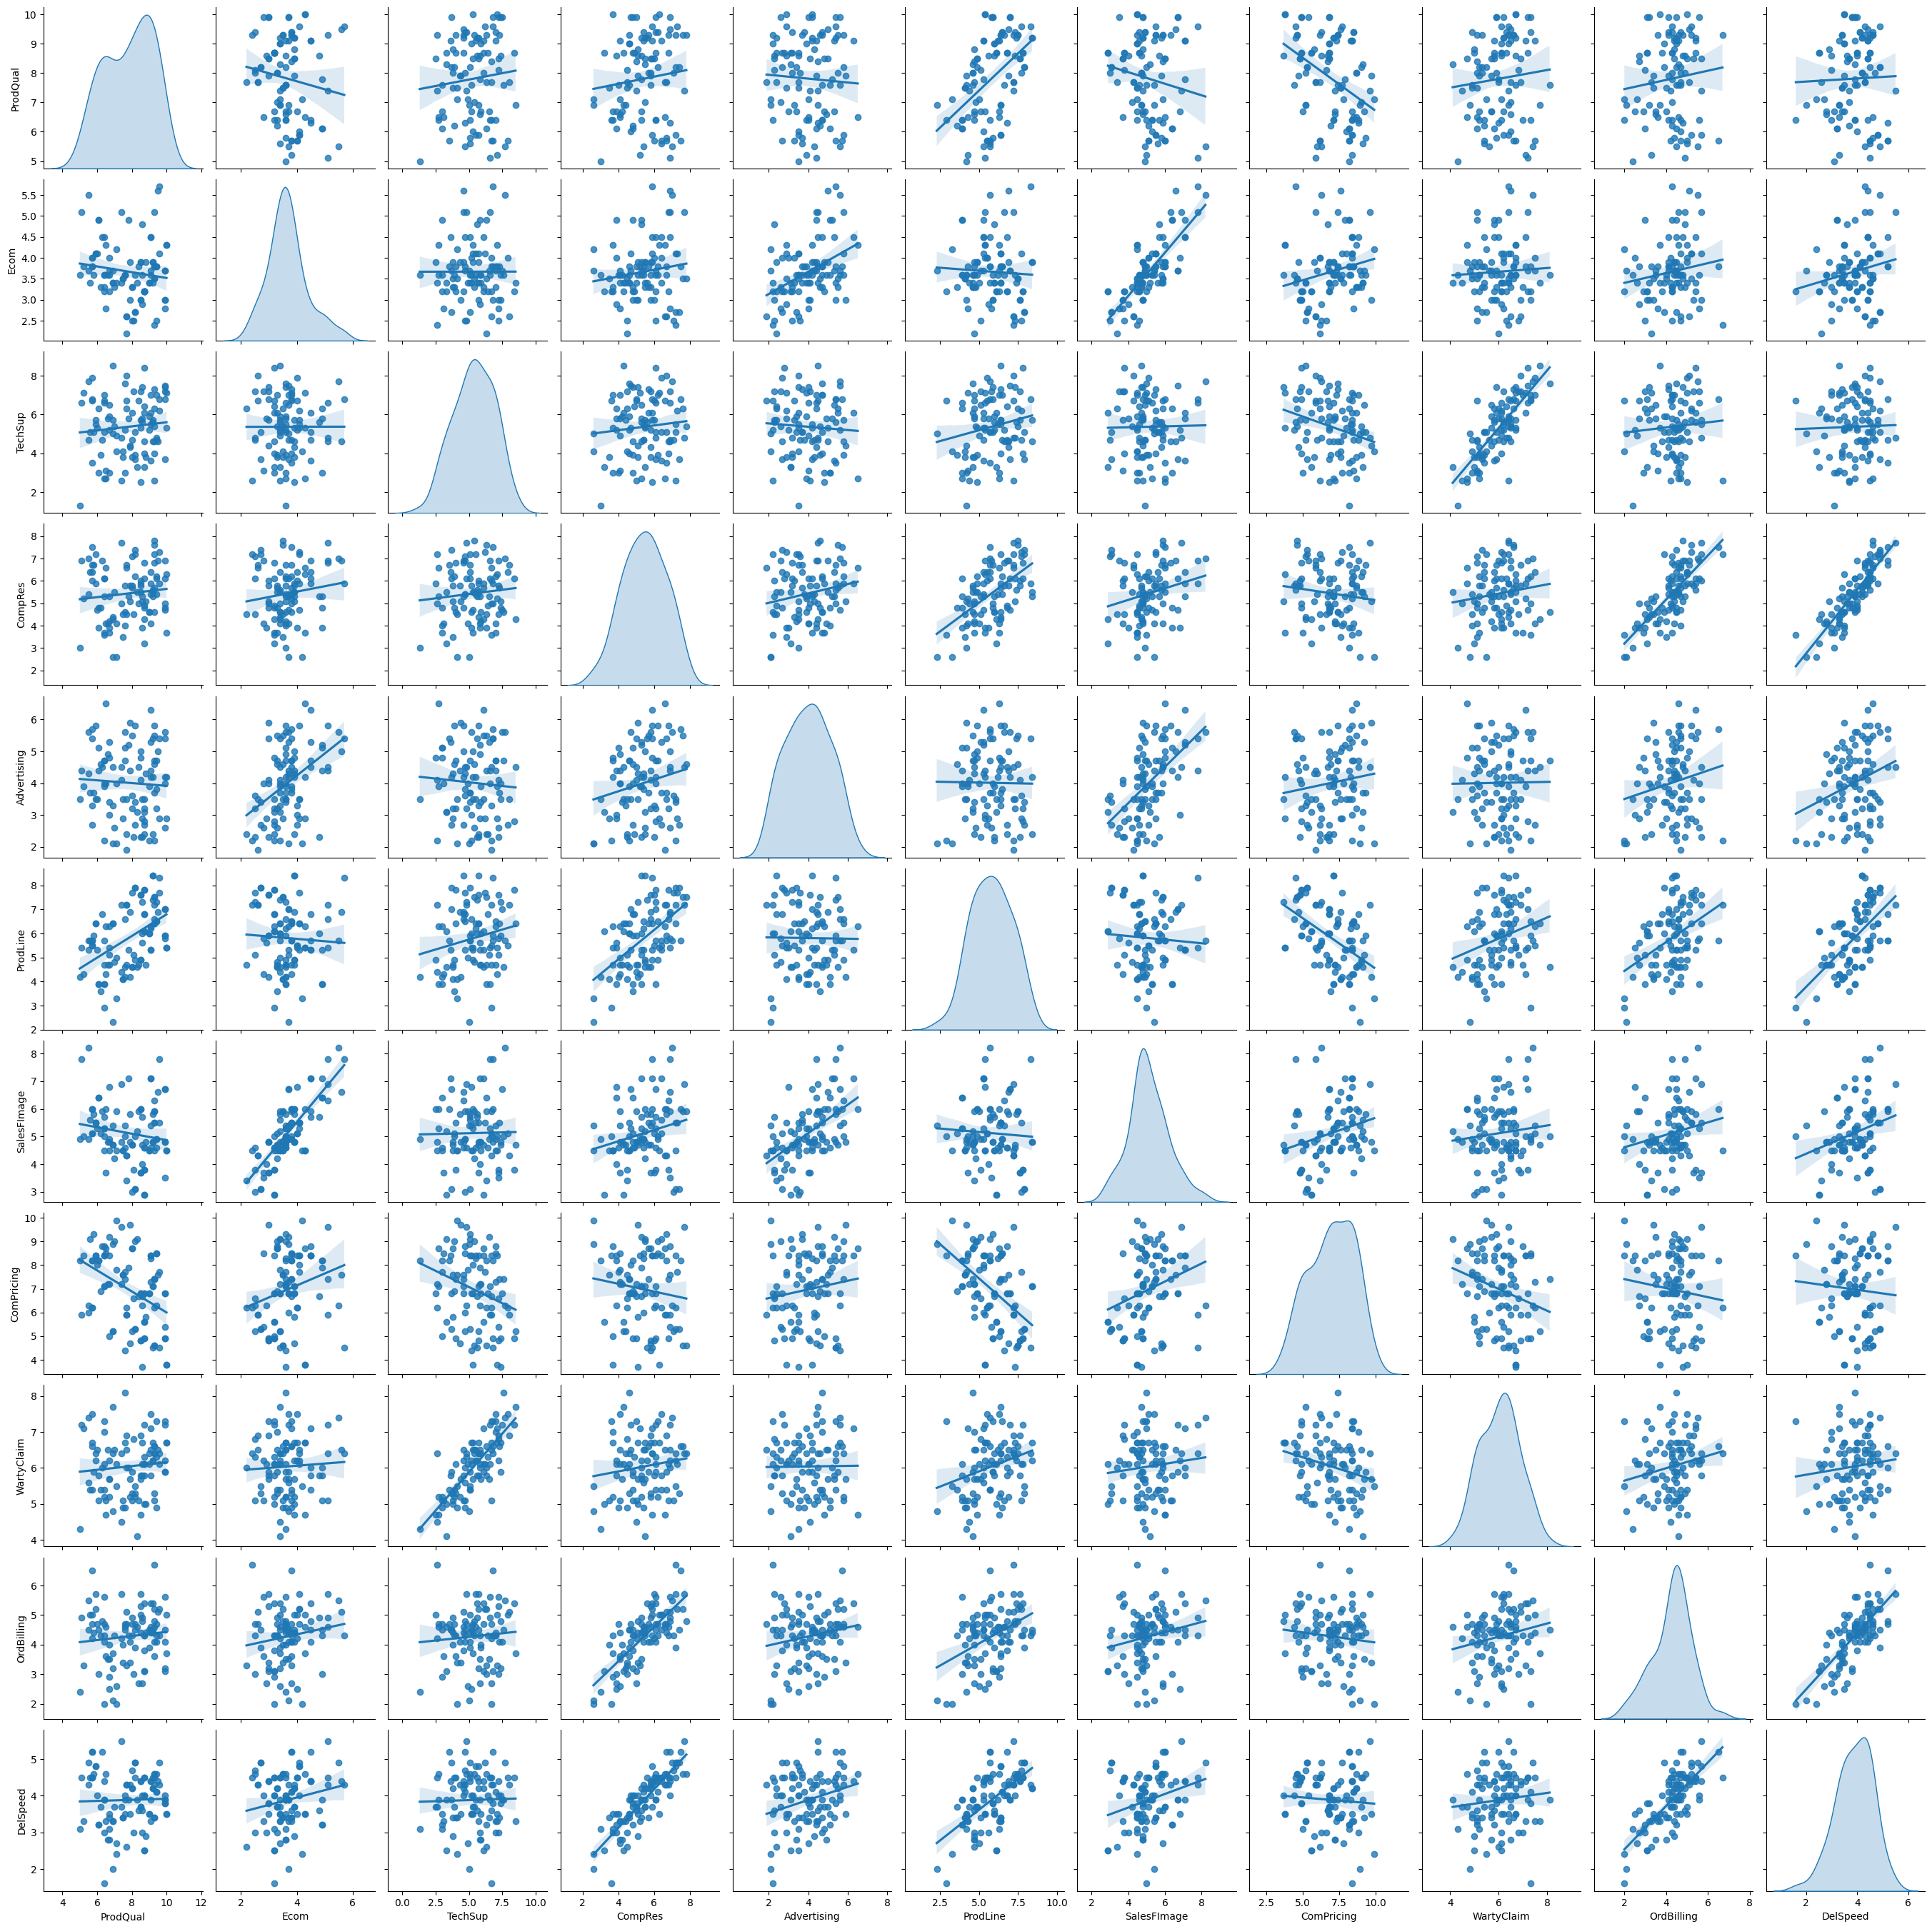

In [16]:
sns.pairplot(data = df, kind='reg', diag_kind = 'kde')

<Axes: >

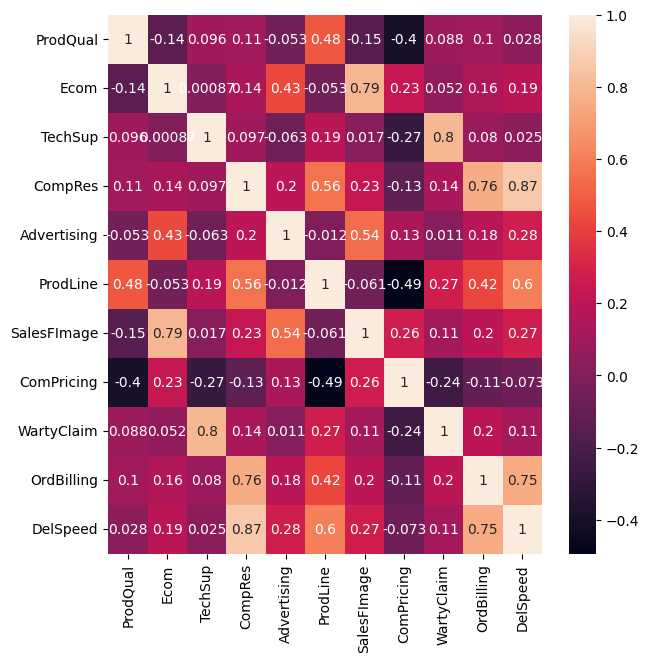

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

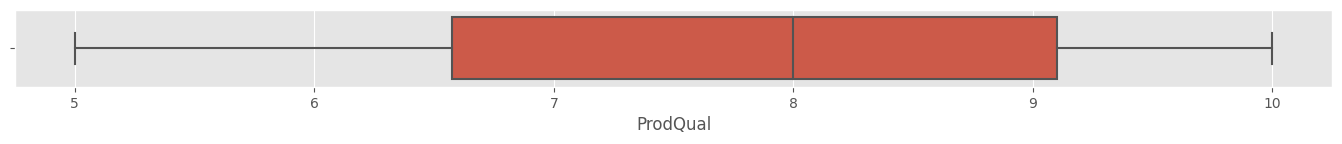

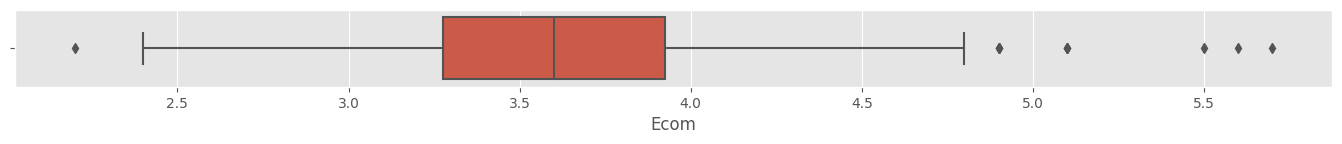

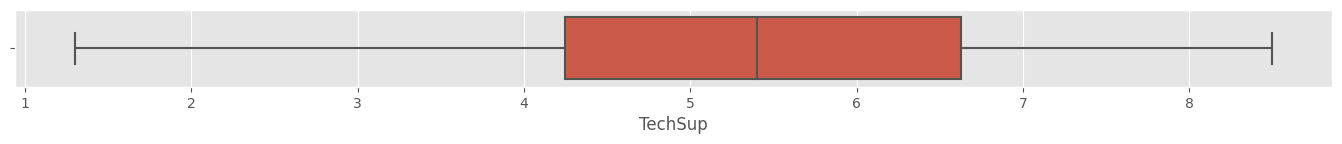

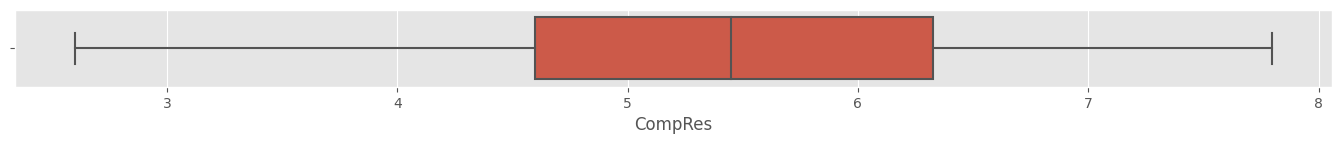

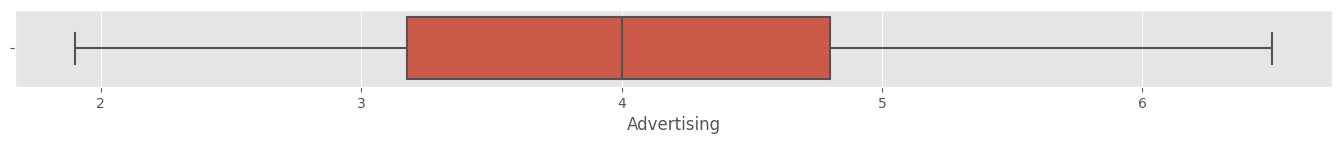

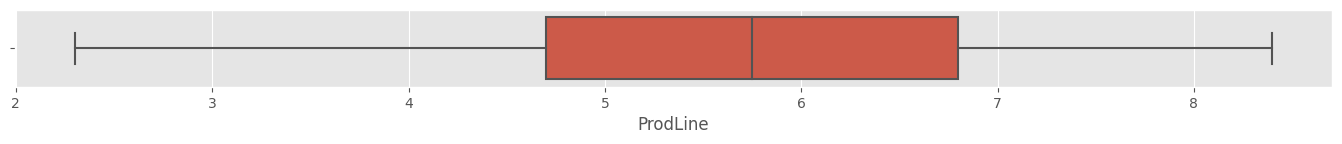

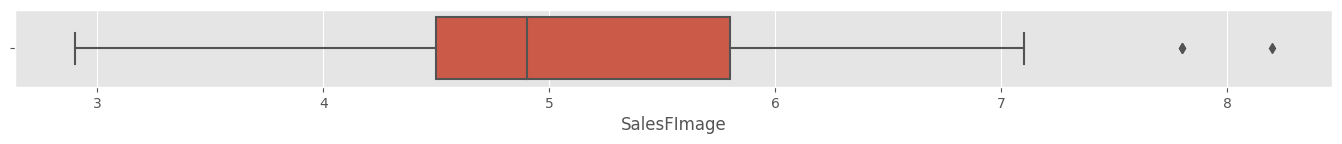

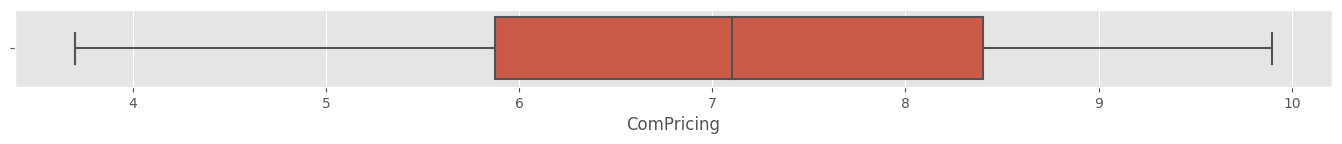

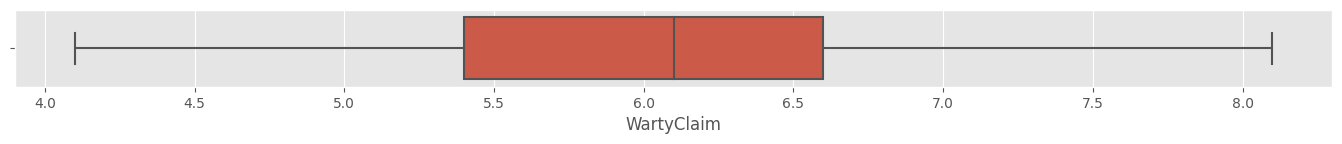

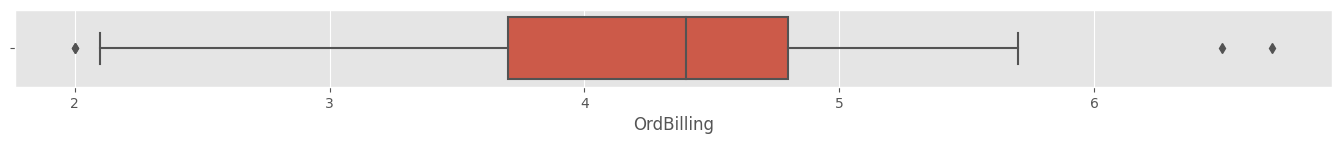

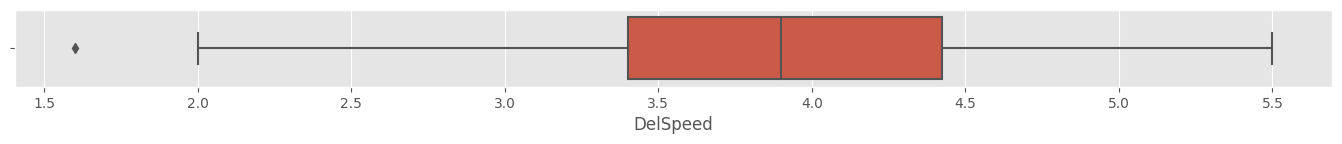

In [ ]:
#box plot of all columns
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [ ]:
#treating outliers:
def impute_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [ ]:
#capping outliers:

for column in df:     
  lr,ur=impute_outlier(df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])
  df[column]=np.where(df[column]<lr,lr,df[column])

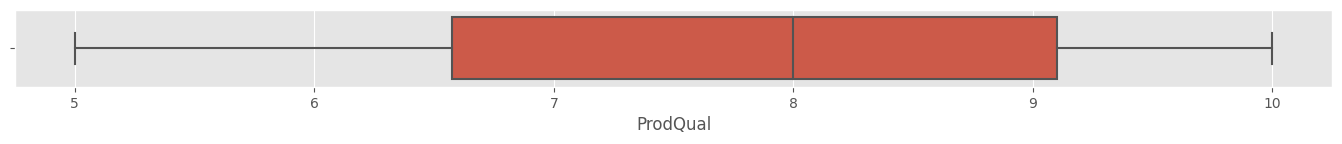

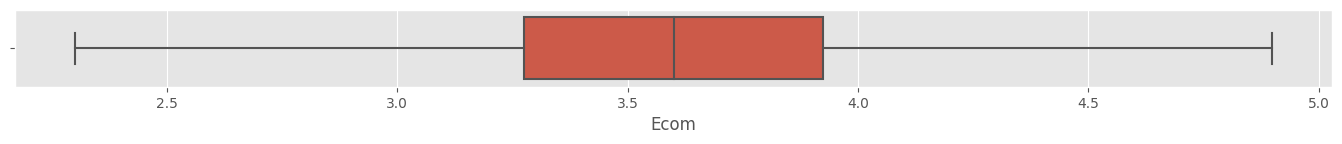

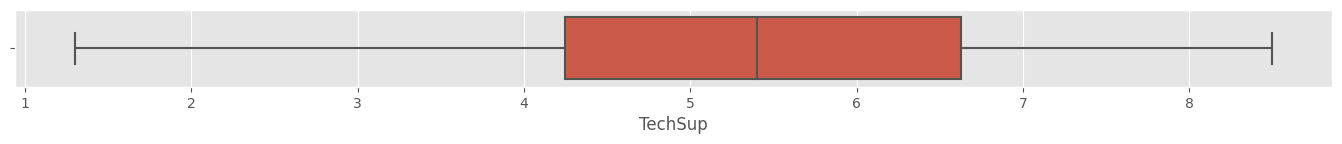

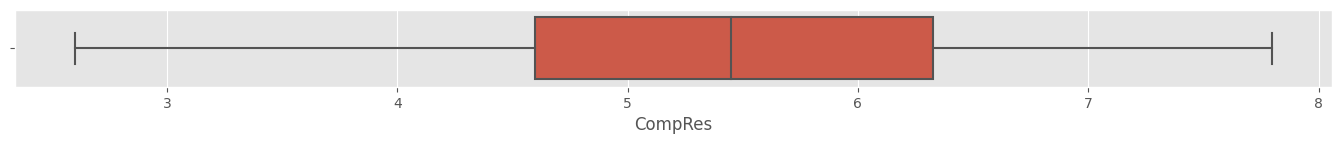

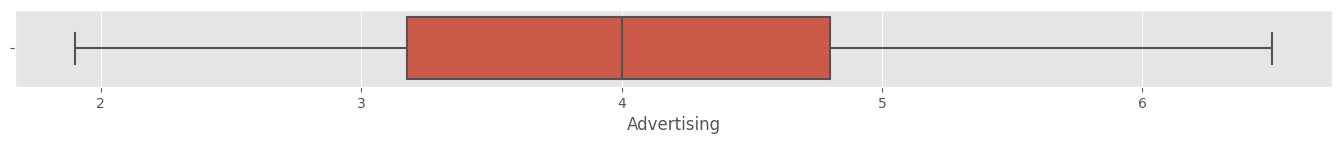

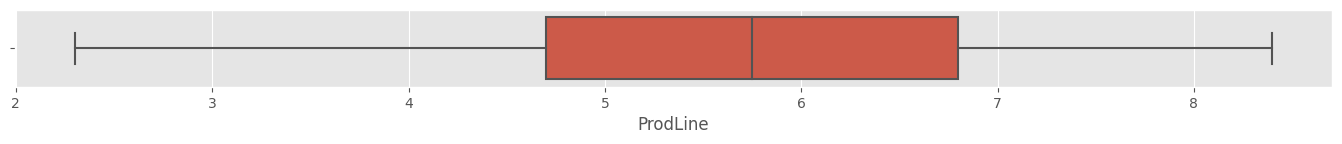

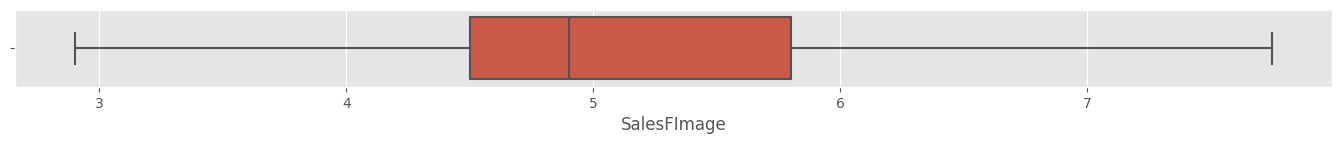

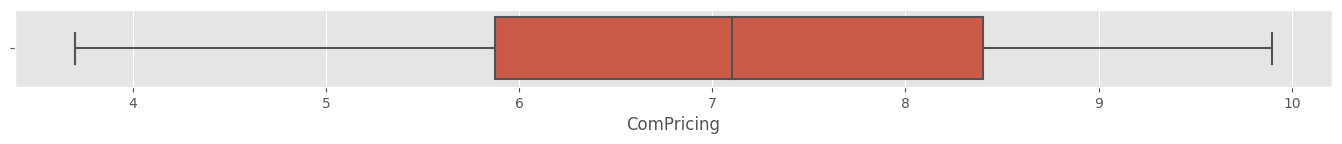

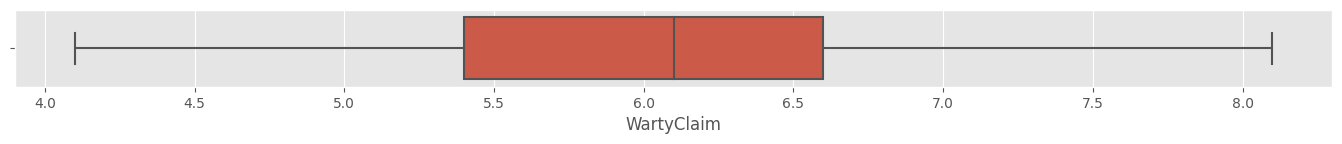

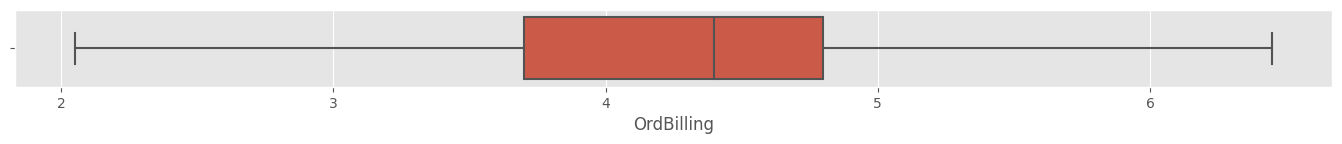

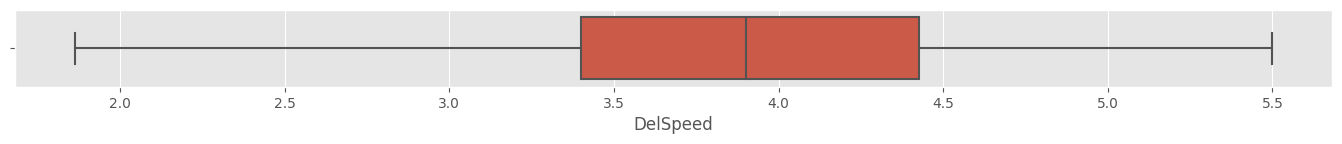

In [ ]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

There are very few olutlers so outlier treatment not necessary

In [ ]:
#pca model building


In [ ]:
#scaling
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaled.describe()
X=df_scaled
Y=df_scaled


In [ ]:
#before sclaing
df.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7.810000,3.64600,5.365000,5.442000,4.010000,5.805000,5.117500,6.974000,6.043000,4.276000,3.888625
std,1.396279,0.63555,1.530457,1.208403,1.126943,1.315285,1.057617,1.545055,0.819738,0.918895,0.726612
min,5.000000,2.30000,1.300000,2.600000,1.900000,2.300000,2.900000,3.700000,4.100000,2.050000,1.862500
25%,6.575000,3.27500,4.250000,4.600000,3.175000,4.700000,4.500000,5.875000,5.400000,3.700000,3.400000
50%,8.000000,3.60000,5.400000,5.450000,4.000000,5.750000,4.900000,7.100000,6.100000,4.400000,3.900000
75%,9.100000,3.92500,6.625000,6.325000,4.800000,6.800000,5.800000,8.400000,6.600000,4.800000,4.425000
max,10.000000,4.90000,8.500000,7.800000,6.500000,8.400000,7.750000,9.900000,8.100000,6.450000,5.500000


In [ ]:
#aftter scaling

df_scaled.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,9.188483e-16,7.216450e-16,1.029177e-15,-1.432188e-16,-6.061818e-16,2.531308e-16,2.592371e-16,-7.105427e-16,-1.247891e-15,2.220446e-16,9.037215e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.022630e+00,-2.128522e+00,-2.669451e+00,-2.363712e+00,-1.881755e+00,-2.678246e+00,-2.107257e+00,-2.129693e+00,-2.382210e+00,-2.434679e+00,-2.802505e+00
25%,-8.889494e-01,-5.866876e-01,-7.322109e-01,-7.002976e-01,-7.446754e-01,-8.443545e-01,-5.868010e-01,-7.148848e-01,-7.883484e-01,-6.299979e-01,-6.758585e-01
50%,1.367614e-01,-7.274293e-02,2.298420e-02,6.653659e-03,-8.918268e-03,-4.202669e-02,-2.066870e-01,8.196131e-02,6.988470e-02,1.356245e-01,1.573372e-02
75%,9.285383e-01,4.412017e-01,8.274312e-01,7.343976e-01,7.045432e-01,7.603011e-01,6.485695e-01,9.275939e-01,6.829084e-01,5.731231e-01,7.419056e-01
max,1.576356e+00,1.983036e+00,2.058728e+00,1.961166e+00,2.220649e+00,1.982896e+00,2.501625e+00,1.903324e+00,2.521979e+00,2.377804e+00,2.228829e+00


PCA MODEL 

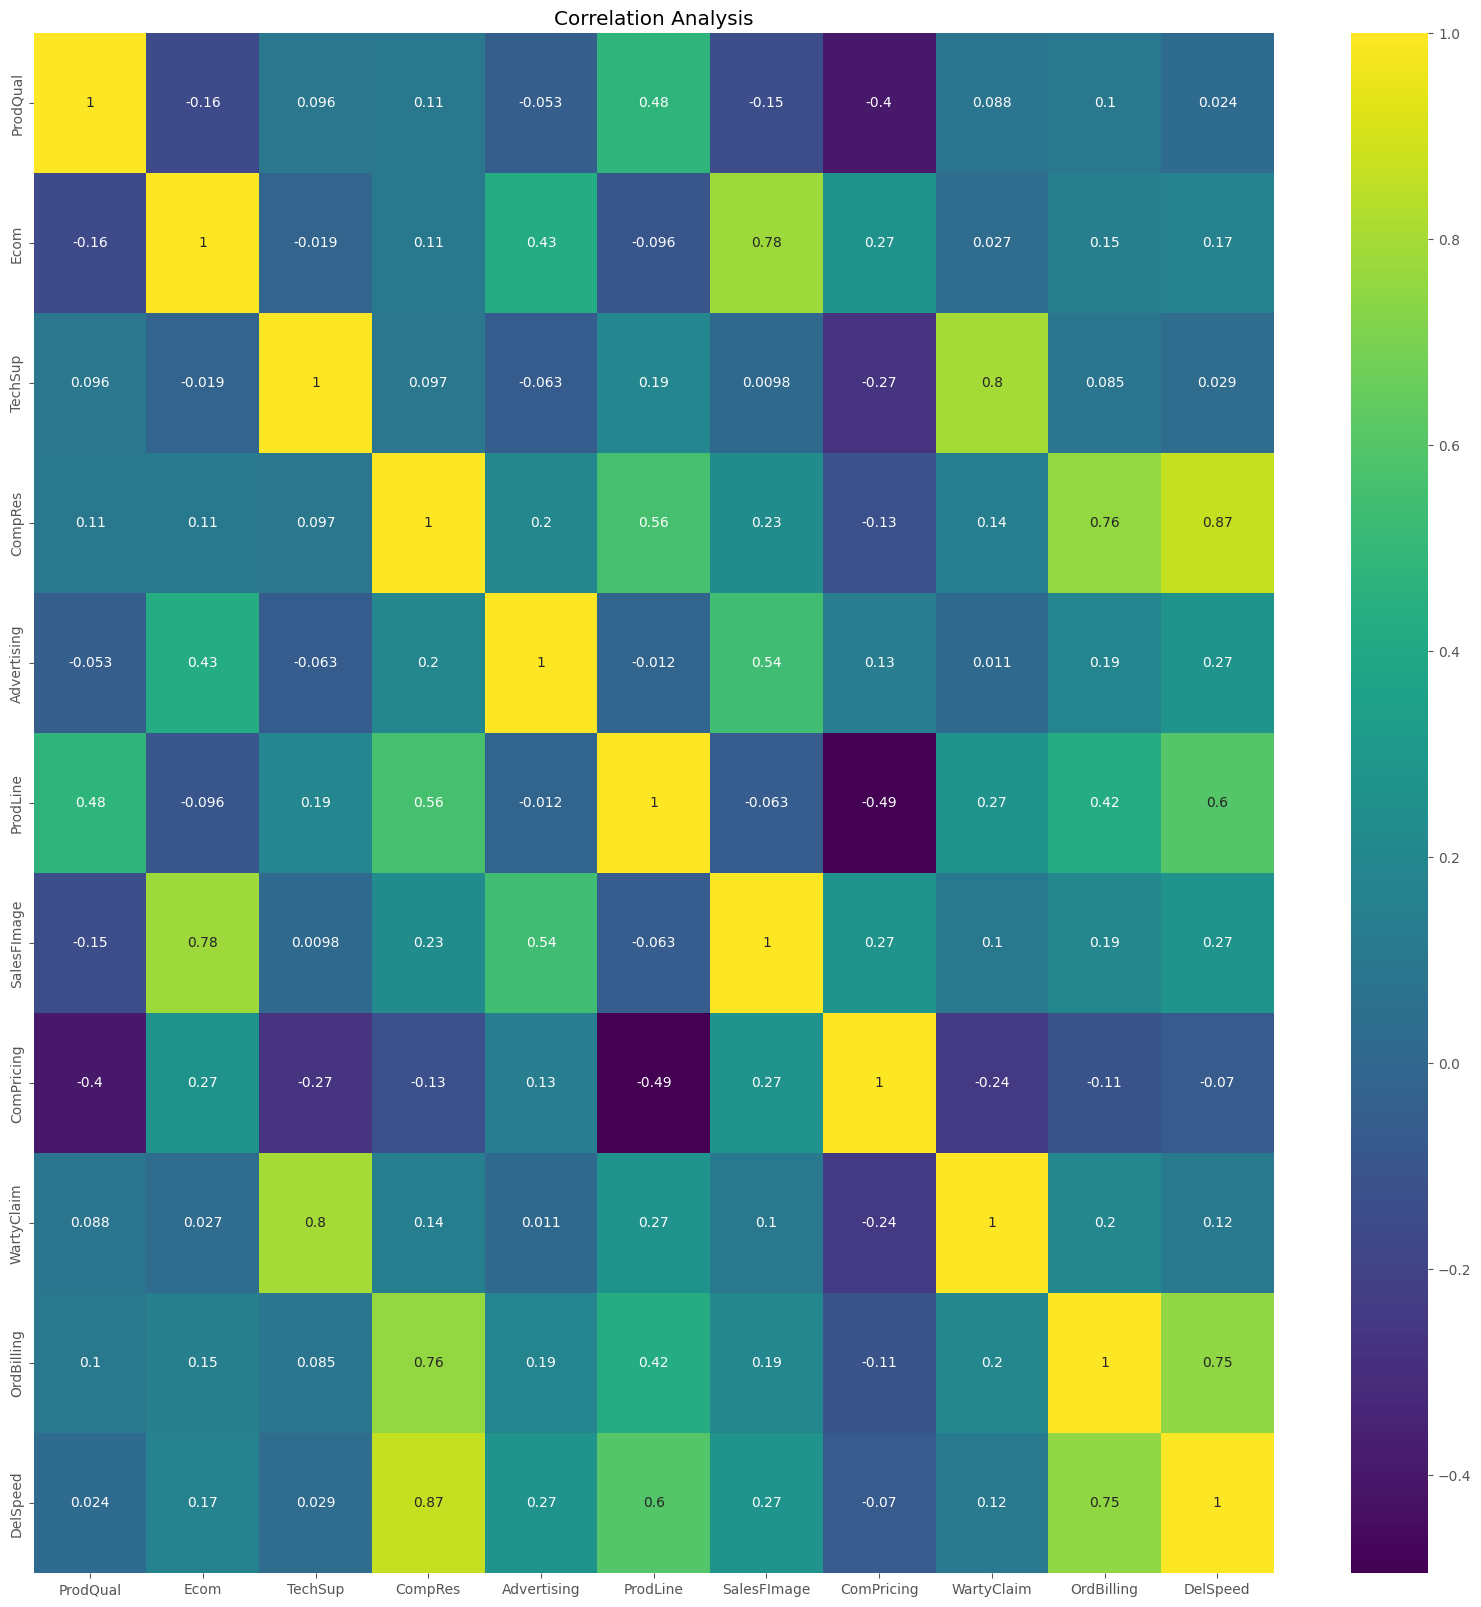

In [ ]:
#Correlation Analysis:

matrix= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True,cmap='viridis',annot_kws = {'size': 10})
plt.title("Correlation Analysis")
plt.show()

In [ ]:
#correlation matric
df.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.161588,0.095600,0.106370,-0.053473,0.477493,-0.146498,-0.401282,0.088312,0.102495,0.024332
Ecom,-0.161588,1.000000,-0.018786,0.109386,0.425123,-0.096342,0.779244,0.268064,0.027380,0.146505,0.168147
TechSup,0.095600,-0.018786,1.000000,0.096657,-0.062870,0.192625,0.009836,-0.270787,0.797168,0.085443,0.028898
CompRes,0.106370,0.109386,0.096657,1.000000,0.196917,0.561417,0.226647,-0.127954,0.140408,0.757995,0.868846
Advertising,-0.053473,0.425123,-0.062870,0.196917,1.000000,-0.011551,0.542923,0.134217,0.010792,0.188005,0.272973
ProdLine,0.477493,-0.096342,0.192625,0.561417,-0.011551,1.000000,-0.062584,-0.494948,0.273078,0.423870,0.600272
SalesFImage,-0.146498,0.779244,0.009836,0.226647,0.542923,-0.062584,1.000000,0.271246,0.100953,0.194695,0.271213
ComPricing,-0.401282,0.268064,-0.270787,-0.127954,0.134217,-0.494948,0.271246,1.000000,-0.244986,-0.113318,-0.070289
WartyClaim,0.088312,0.027380,0.797168,0.140408,0.010792,0.273078,0.100953,-0.244986,1.000000,0.198106,0.116168
OrdBilling,0.102495,0.146505,0.085443,0.757995,0.188005,0.423870,0.194695,-0.113318,0.198106,1.000000,0.752298


In [ ]:
#covariance matrix
df.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.949596,-0.143394,0.204293,0.179475,-0.084141,0.876919,-0.216338,-0.865697,0.101081,0.131505,0.024686
Ecom,-0.143394,0.403923,-0.018273,0.084008,0.304485,-0.080535,0.523783,0.263228,0.014265,0.085560,0.077650
TechSup,0.204293,-0.018273,2.342298,0.178758,-0.108434,0.387753,0.015922,-0.640313,1.000106,0.120162,0.032136
CompRes,0.179475,0.084008,0.178758,1.460238,0.268162,0.892313,0.289662,-0.238897,0.139085,0.841675,0.762882
Advertising,-0.084141,0.304485,-0.108434,0.268162,1.270000,-0.017121,0.647096,0.233697,0.009970,0.194687,0.223524
ProdLine,0.876919,-0.080535,0.387753,0.892313,-0.017121,1.729975,-0.087058,-1.005828,0.294429,0.512293,0.573681
SalesFImage,-0.216338,0.523783,0.015922,0.289662,0.647096,-0.087058,1.118554,0.443237,0.087523,0.189212,0.208421
ComPricing,-0.865697,0.263228,-0.640313,-0.238897,0.233697,-1.005828,0.443237,2.387196,-0.310285,-0.160883,-0.078910
WartyClaim,0.101081,0.014265,1.000106,0.139085,0.009970,0.294429,0.087523,-0.310285,0.671971,0.149224,0.069194
OrdBilling,0.131505,0.085560,0.120162,0.841675,0.194687,0.512293,0.189212,-0.160883,0.149224,0.844368,0.502294


In [ ]:
# The PCA model implementation
pca = PCA()
df_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
exp_var = pca.explained_variance_ratio_


[0.30985157 0.23510622 0.15253007 0.0983187  0.05554659 0.04946296
 0.03654068 0.02244916 0.01936518 0.01200183 0.00882704]


In [ ]:
print("Eigenvalues: ",np.round(exp_var,3))

Eigenvalues:  [0.31  0.235 0.153 0.098 0.056 0.049 0.037 0.022 0.019 0.012 0.009]


The first principal component explains 28.68% of the total variation in the 
dataset.
The second principal component explains 21.296% of the total variation.
The third principal component explains 14.38% of the total variation.
The fourth principal component explains 10.28% of the total variation.

In [ ]:
eigenvector=pca.components_
print("Eigenvector: ")
print(np.round(eigenvector,3))

Eigenvector: 
[[-0.139 -0.133 -0.162 -0.474 -0.176 -0.393 -0.19   0.158 -0.216 -0.441
  -0.475]
 [-0.306  0.461 -0.226  0.033  0.364 -0.273  0.472  0.41  -0.186  0.043
   0.087]
 [ 0.067 -0.229 -0.616  0.206 -0.091  0.118 -0.238  0.047 -0.604  0.158
   0.223]
 [ 0.65   0.257 -0.181 -0.204  0.333  0.203  0.235 -0.329 -0.172 -0.229
  -0.2  ]
 [ 0.29   0.405 -0.009  0.026 -0.782  0.111  0.193  0.294 -0.018  0.044
  -0.034]
 [ 0.53  -0.304  0.108  0.031  0.258 -0.109 -0.129  0.698  0.138  0.108
  -0.024]
 [ 0.195  0.075 -0.003 -0.008 -0.048 -0.607 -0.035 -0.299 -0.039  0.663
  -0.231]
 [ 0.133 -0.189  0.42   0.514 -0.078 -0.344  0.257 -0.11  -0.405 -0.369
   0.059]
 [ 0.012 -0.522 -0.412  0.017 -0.157 -0.075  0.621 -0.082  0.365 -0.021
  -0.036]
 [ 0.089  0.282 -0.39   0.506  0.027 -0.265 -0.346 -0.061  0.446 -0.33
  -0.045]
 [ 0.178  0.036 -0.015 -0.41  -0.077 -0.36  -0.056 -0.101  0.083 -0.167
   0.784]]


In [ ]:
 #find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  6


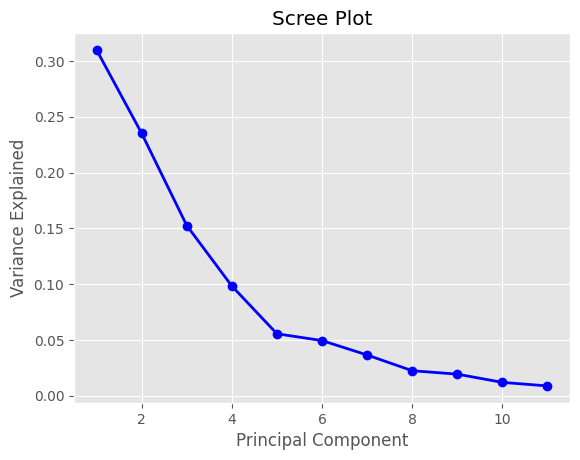

In [ ]:
#create scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

We can see that the first two features have the most variance here. Now we train the model.

Optimum no of components =7

In [ ]:
pca = PCA(n_components=7,random_state=123)
df_pca = pca.fit_transform(X)
df_pca.transpose()#component output


array([[ 1.03447909e-01, -1.18573959e+00, -2.23335070e+00,
         1.56651425e+00,  7.33564748e-01,  2.90499826e+00,
         5.35572860e+00,  1.48897658e+00, -6.10638976e-01,
        -3.85689008e-01,  5.41922790e-01,  1.95293864e+00,
        -2.46579576e+00, -1.19278085e+00, -1.96423049e+00,
        -1.26070977e+00, -6.37899005e-01, -1.95924210e+00,
        -4.45953932e-01, -1.13923536e+00,  1.35275878e+00,
        -2.84610643e+00, -1.27980681e+00, -1.93295664e+00,
         2.89962628e-01, -3.47349806e-01, -1.84659625e+00,
         1.01439605e+00, -1.38454915e+00,  1.68194294e+00,
         1.22178083e-01,  2.06497383e+00,  1.09756172e+00,
        -1.17263834e-01,  1.85449131e+00,  2.09098633e+00,
         6.01843337e-01, -2.60812287e+00, -3.35480359e-01,
         1.30164609e+00,  1.25839795e+00,  1.65339335e-01,
        -1.73077200e+00, -2.23143236e+00, -9.60902011e-01,
        -1.64179510e+00, -1.06402122e+00, -3.10913626e+00,
        -1.07113986e+00, -7.98518651e-01,  2.00011007e+0

In [ ]:
pca_index = ['PC1','PC2','PC3','PC4','PC5','PC6','Pc7']
data_pca = pd.DataFrame(pca.components_,index=pca_index,columns=list(df_scaled.columns))
data_pca.shape

(7, 11)

In [ ]:
data_pca=np.round(data_pca,2)
data_pca.transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7
ProdQual,-0.14,-0.31,0.07,0.65,0.29,0.53,0.19
Ecom,-0.13,0.46,-0.23,0.26,0.41,-0.30,0.08
TechSup,-0.16,-0.23,-0.62,-0.18,-0.01,0.11,-0.00
CompRes,-0.47,0.03,0.21,-0.20,0.03,0.03,-0.01
Advertising,-0.18,0.36,-0.09,0.33,-0.78,0.26,-0.05
ProdLine,-0.39,-0.27,0.12,0.20,0.11,-0.11,-0.61
SalesFImage,-0.19,0.47,-0.24,0.23,0.19,-0.13,-0.04
ComPricing,0.16,0.41,0.05,-0.33,0.29,0.70,-0.30
WartyClaim,-0.22,-0.19,-0.60,-0.17,-0.02,0.14,-0.04
OrdBilling,-0.44,0.04,0.16,-0.23,0.04,0.11,0.66


In [ ]:
data_pca.style.highlight_min(color="lightgreen",axis=0)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
PC1,-0.140000,-0.130000,-0.160000,-0.470000,-0.180000,-0.390000,-0.190000,0.160000,-0.220000,-0.440000,-0.480000
PC2,-0.310000,0.460000,-0.230000,0.030000,0.360000,-0.270000,0.470000,0.410000,-0.190000,0.040000,0.090000
PC3,0.070000,-0.230000,-0.620000,0.210000,-0.090000,0.120000,-0.240000,0.050000,-0.600000,0.160000,0.220000
PC4,0.650000,0.260000,-0.180000,-0.200000,0.330000,0.200000,0.230000,-0.330000,-0.170000,-0.230000,-0.200000
PC5,0.290000,0.410000,-0.010000,0.030000,-0.780000,0.110000,0.190000,0.290000,-0.020000,0.040000,-0.030000
PC6,0.530000,-0.300000,0.110000,0.030000,0.260000,-0.110000,-0.130000,0.700000,0.140000,0.110000,-0.020000
Pc7,0.190000,0.080000,-0.000000,-0.010000,-0.050000,-0.610000,-0.040000,-0.300000,-0.040000,0.660000,-0.230000


In [ ]:
print("Linear expression of PC1 :")
for i in range(0,11):
    print(" (",np.round(pca.components_[0][i],2),")",'*',df.columns[i], end=' + ')


Linear expression of PC1 :
 ( -0.14 ) * ProdQual +  ( -0.13 ) * Ecom +  ( -0.16 ) * TechSup +  ( -0.47 ) * CompRes +  ( -0.18 ) * Advertising +  ( -0.39 ) * ProdLine +  ( -0.19 ) * SalesFImage +  ( 0.16 ) * ComPricing +  ( -0.22 ) * WartyClaim +  ( -0.44 ) * OrdBilling +  ( -0.48 ) * DelSpeed + 